# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

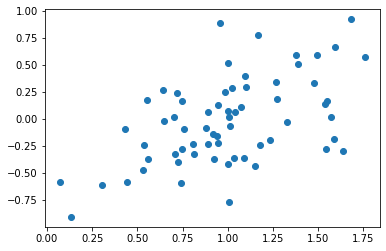

In [3]:
plt.scatter(x.T[0], y)

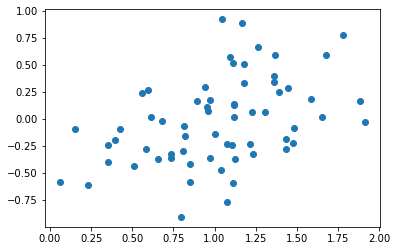

In [4]:
plt.scatter(x.T[1], y)

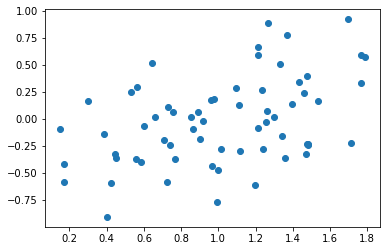

In [5]:
plt.scatter(x.T[2], y)

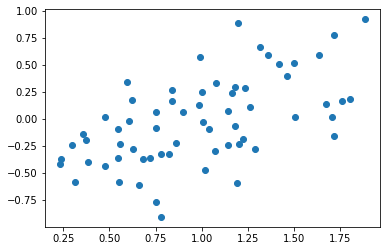

In [6]:
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model (like we did in class) to fit the data. *Use the example from Lesson 3 and do not use a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), create a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [7]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
np.dot(left, right)

array([ 0.30360247,  0.01451847,  0.12439795,  0.33487648, -0.79069883])

In [9]:
beta = np.dot(left, right)
pred = np.dot(x, beta)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

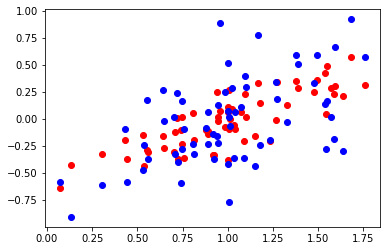

In [10]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

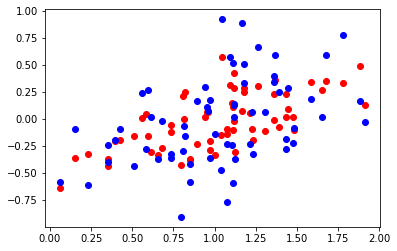

In [13]:
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

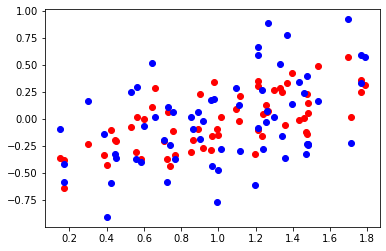

In [14]:
plt.scatter(x.T[2], pred, c='red')
plt.scatter(x.T[2], y, c='b')

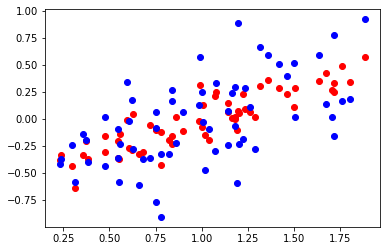

In [15]:
plt.scatter(x.T[3], pred, c='red')
plt.scatter(x.T[3], y, c='b')

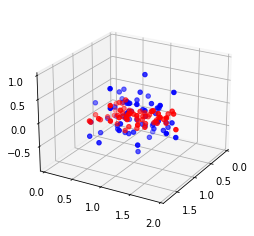

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(x.T[0], x.T[1], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[1], y, zdir='z', c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [24]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [25]:
columns = ['Income', 'Limit', 'Age', 'Balance']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 9.66000e+02, 1.00000e+00]])

In [26]:
y = credit['Rating']

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can. Do you 

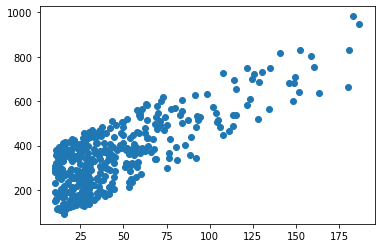

In [27]:
plt.scatter(X.T[0], y)

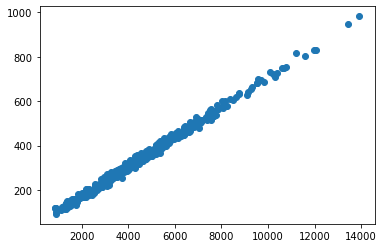

In [29]:
plt.scatter(X.T[1], y)

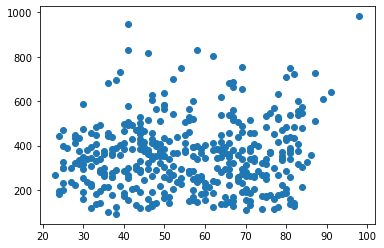

In [30]:
plt.scatter(X.T[2], y)

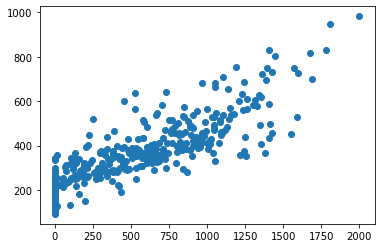

In [31]:
plt.scatter(X.T[3], y)

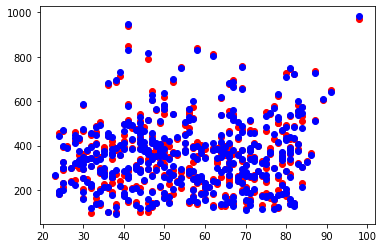

In [34]:
credit_left = np.linalg.inv(np.dot(X.T, X))
credit_right = np.dot(y.T, X)

credit_beta = np.dot(credit_left, credit_right)
credit_pred = np.dot(X, credit_beta)

plt.scatter(X.T[2], credit_pred, c='red')
plt.scatter(X.T[2], y, c='b')

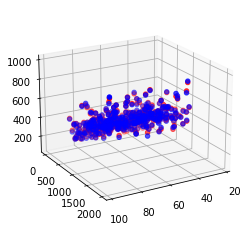

In [41]:
credit_fig = plt.figure()
credit_ax = credit_fig.add_subplot(111, projection='3d')

credit_ax.view_init(20, 60)

credit_ax.scatter(X.T[2], X.T[3], credit_pred, zdir='z', c='r')
credit_ax.scatter(X.T[2], X.T[3], y, zdir='z', c='b')